In [1]:
# %matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
import random
from IPython import display

# Definicje funkcji, z których będziemy korzystać

Do zrozumienia statystycznych symulacji nie jest konieczne rozumieć, jak poniższe funkcje zostały skonstruowane

In [2]:
def random_simulator(sim_type, **kwargs):
    if sim_type == 'game':
        score = kwargs.get('starting_score')
        n_throws = kwargs.get('n_throws')
        game_price = kwargs.get('game_price')
        coin_results = random.choices([0, 1], k = 5)
        for coin_result in coin_results:
            if coin_result == 1:
                break
            else:
                score = score*2
        result = score - game_price
    elif sim_type == 'coin_toss':
        result = random.randrange(-1, 2, 2)
    elif sim_type == 'normal':
        n_digits = kwargs.get('n_digits')
        result = round(random.gauss(0, 1), n_digits)
    else:
        result = None
    return result

In [3]:
def simulation_histogram(sim_type, liczba_gier, left, right, top, bin_width, **kwargs):
    simulation_results = dict()

    figure, ax = plt.subplots(figsize=(10, 8))

    account_balance = 0

    for i in range(liczba_gier+1):
        if (i+1)%5 == 0:
            ax.clear()
        ax.texts = []
        ax.set_ylim(bottom = 0, top = top)
        ax.set_xlim(left = left, right = right)
        game_result = random_simulator(sim_type, **kwargs)
        account_balance += game_result
        if simulation_results.get(game_result) is None:
            simulation_results[game_result] = 1
        else:
            simulation_results[game_result] += 1
        hist1 = ax.bar(list(simulation_results.keys()), list(simulation_results.values()), width=bin_width, edgecolor="white", linewidth=0.7, color = 'blue')
        account_balance_text = ax.text(x = min(list(simulation_results.keys())), y = top*0.95, s = 'Account balance: ' + str(account_balance), 
                 bbox=dict(facecolor='white', alpha=1), fontsize = 'x-large')
        games_n_text = ax.text(x = min(list(simulation_results.keys())), y = top*0.85, s = '# Games: ' + str(i), 
                 bbox=dict(facecolor='white', alpha=1), fontsize = 'x-large')
        display.clear_output(wait=True)
        display.display(figure)
        time.sleep(0.02)
    plt.close()

# Rozkład normalny

## Losujemy wielokrotnie zmienną o rozkładzie normalnym

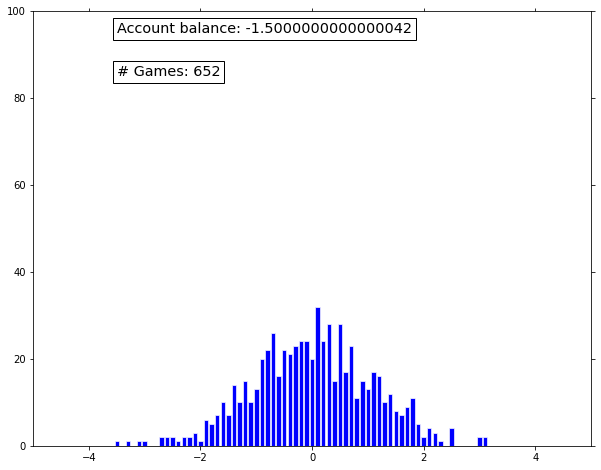

In [ ]:
simulation_histogram('normal', 1000, -5, 5, 100, 0.08, n_digits = 1)

## Centralne Twierdzenie Graniczne

Wobraź sobie prostą grę, w której rzucasz monetą:

 - jeśli wypadł orzeł, wygrywasz 1 PLN
 - jeśli wypadła reszka, tracisz 1 PLN
 
Wobraź sobie teraz, że grasz w tę grę wiele razy, np. 100. Twój wynik na koncie będzie sumą wyników z każdego rzutu.

Na koniec wyobraź sobie, że coś takiego robi tysiące osób, np. 10000. Rozkład Waszych końcowych wyników na koncie będzie w przybliżeniu rozkładem normalnym! Możemy to zobaczyć na poniższej symulacji. 

In [ ]:
liczba_osob = 10000

In [ ]:
def account_balance_simulator(sim_type, n_games, **kwargs):
    account_balance = 0
    for i in range(n_games):
        simulation_result = random_simulator(sim_type, **kwargs)
        account_balance += simulation_result
    return account_balance

In [ ]:
account_results = dict()
for i in range(liczba_osob):
    account_balance = account_balance_simulator('coin_toss', 100)
    if account_results.get(account_balance) is None:
        account_results[account_balance] = 1
    else:
        account_results[account_balance] += 1

In [ ]:
fig_normal, ax_normal = plt.subplots(figsize=(10, 8))
hist_normal = ax_normal.bar(list(account_results.keys()), list(account_results.values()), width=1, edgecolor="blue", linewidth=0.7, color = 'blue')
display.display(fig_normal)
plt.close()